In [3]:
# import libraries
from simpletransformers.classification import MultiLabelClassificationModel
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier

ModuleNotFoundError: No module named 'torch'

In [2]:
pip install simpletransformers

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 4.12.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
tensorflow 2.4.1 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.



  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=a80a0d3e703aa7b6ef7fb5cbb963fd1e63da8d284c3ea7b0879fda08771e8e38
  Stored in directory: c:\users\laure\appdata\local\pip\cache\wheels\54\aa\01\724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16170 sha256=0d90943a2b6b3bbd80f2130bc3b77dbaa8246c519d4d0273101cf6ea22cac3d4
  Stored in directory: c:\users\laure\appdata\local\pip\cache\wheels\ad\5c\ba\05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19567 sha256=0b1ed31de730e4774f7bb3a99bf625771ad6c5171fa3f3018ceb717c983224d6
  Stored in directory: c:\users\laure\appdata\local\pip\cache\wheels\19\09\72\3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built promise seqeval validators
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.9
    Uninstalling urllib3-

In [58]:
# Update to 10 Categories
## Pull in raw data
# this is the file with 
#one git file change per line
df_ccxp_raw=pd.read_csv(r'CCXP_Jira_Github_Commit_Dataset_20220823.csv') 
## drop rows where summary and descriptions columns are blank -- these are not bugs per Paul
df_ccxp_raw_new=df_ccxp_raw.dropna(subset=['summary','description'], how='all')

In [3]:
#df_ccxp_raw_new.head()

In [4]:
# Number of unique files with bugs from ccxp raw
print('Unique files for CCXP raw dataset: ',df_ccxp_raw_new['filename'].nunique())
print('Unique jira tickets for CCXP bugs dataset',df_ccxp_raw_new['jira_ticket'].nunique())

Unique files for CCXP raw dataset:  3005
Unique jira tickets for CCXP bugs dataset 385


In [5]:
df_ccxp_raw_new1=df_ccxp_raw_new

In [6]:
df_ccxp_raw_new1['description']=df_ccxp_raw_new1['description'].str.replace(r'\r', ' ')
df_ccxp_raw_new1['description']= df_ccxp_raw_new1['description'].str.replace(r'\n', ' ')     

C:\Users\laurenwinstead_la\AppData\Local\Temp\ipykernel_48244\570337101.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ccxp_raw_new1['description']=df_ccxp_raw_new1['description'].str.replace(r'\r', ' ')
C:\Users\laurenwinstead_la\AppData\Local\Temp\ipykernel_48244\570337101.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ccxp_raw_new1['description']= df_ccxp_raw_new1['description'].str.replace(r'\n', ' ')


In [7]:
#df_ccxp_raw_new1.description.values

In [8]:
# Remove images embedded in description

In [9]:
 df_ccxp_raw_new1['description']= df_ccxp_raw_new1['description'].str.replace(r'([-\w]+\.(?:jpg|gif|png|jpeg|.mov))','image')

C:\Users\laurenwinstead_la\AppData\Local\Temp\ipykernel_48244\1251986576.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ccxp_raw_new1['description']= df_ccxp_raw_new1['description'].str.replace(r'([-\w]+\.(?:jpg|gif|png|jpeg|.mov))','image')


In [10]:
#df_training.values
#Later split two words apart where second word is uppercase (before next line)
# convert to lowercase:
df_ccxp_raw_new1['description']=df_ccxp_raw_new['description'].str.lower()
df_ccxp_raw_new1['summary']=df_ccxp_raw_new['summary'].str.lower()

df_ccxp_raw_new1['description']=df_ccxp_raw_new['description'].str.strip()
df_ccxp_raw_new1['summary']=df_ccxp_raw_new['summary'].str.strip()

In [59]:
## Analyze unique values per column to consider categorical variables for model predictions
cols=df_ccxp_raw_new.columns
label_cols= list(cols[0:])
num_labels= len(label_cols)
print('Count of distinct values per column: ',df_ccxp_raw[label_cols].nunique().sort_values().to_string())

Count of distinct values per column:  project_url               0
project_description       0
project_name              1
project_lead              1
project_type              1
project_key               1
resolution                1
issue_type                1
status                    4
jira_status               4
priority                  5
repo                      6
last_viewed               9
assignee                 16
creator                  22
reporter                 22
resolved                144
deletions               215
additions               251
changes                 317
updated                 339
created                 385
jira_ticket             385
summary                 385
issue_id                385
description             385
commit                 1268
filename_wo_path       2296
filename               3005


In [12]:
#len(df_ccxp_raw_new.loc[df_ccxp_raw_new.filepath.str.contains('src') & df_ccxp_raw_new.filepath.str.contains('apps/ccxp-web/src/locale')])

In [13]:
# create a column that adds the repo name to the directory for label preparation
df_ccxp_raw_new1['filepath'] = df_ccxp_raw_new1['repo'] + '/'+df_ccxp_raw_new1['filename']
df_ccxp_raw_new1.head(2)

,jira_ticket,commit,filename,filename_wo_path,status,additions,deletions,changes,repo,summary,...,resolution,assignee,reporter,creator,created,updated,last_viewed,resolved,description,filepath
0,CCXP-1076,a8b1300d5f9982811b64f7b8257ef311b73b984c,package-lock.json,package-lock.json,modified,1,1,2,ccxp-data,duplicate specialties created during etl,...,Closed,TUQ0,TUQ0,TUQ0,6/4/2019 15:38,8/14/2019 16:13,7/28/2022 10:45,6/14/2019 10:19,"during the etl run for physicians, specialties...",ccxp-data/package-lock.json
1,CCXP-1076,a8b1300d5f9982811b64f7b8257ef311b73b984c,package.json,package.json,modified,1,1,2,ccxp-data,duplicate specialties created during etl,...,Closed,TUQ0,TUQ0,TUQ0,6/4/2019 15:38,8/14/2019 16:13,7/28/2022 10:45,6/14/2019 10:19,"during the etl run for physicians, specialties...",ccxp-data/package.json


In [14]:
## count the number of jira ticket changes, additions, deletions of mct bug dataset
ticket_changes= df_ccxp_raw.pivot_table(index=['jira_ticket'],values=['additions','changes','deletions'],aggfunc=sum)

In [15]:
## Label the categories: Binarization
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-server/src'),'server']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-data/src'),'data']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-etl/src'),'etl']=int(bool(1))
#df_ccxp_raw_new.loc[df_ccxp_raw_new.filepath.str.contains('ccxp-client/apps/'),'client_app']=int(bool(1))
#df_ccxp_raw_new.loc[df_ccxp_raw_new.filepath.str.contains('ccxp-client/libs/'),'client_lib']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-client/apps/ccxp-web/src/scss'),'ca_scss']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-client/apps/ccxp-web/src/app'),'ca_webapp']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-client/libs/shared/src'),'cl_shared']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-client/libs/features/provider-search/src'),'cl_prov_search']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-client/libs/core/src'),'cl_core']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-client/libs/mymedicare/'),'cl_mymedicare']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-client/libs/features/provider-measures/src'),'cl_feat_pmeasure']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-client/libs/features/provider-details/src'),'cl_feat_pdetails']=int(bool(1))
df_ccxp_raw_new1.loc[df_ccxp_raw_new1.filepath.str.contains('ccxp-client/libs/features/provider-compare/src'),'cl_feat_pcompare']=int(bool(1))


In [16]:
# Select the training data by choosing the rows that have category flags
df_training = df_ccxp_raw_new1.loc[~(df_ccxp_raw_new1.server.isna()\
                &(df_ccxp_raw_new1.data.isna())\
                &(df_ccxp_raw_new1.etl.isna())\
                &(df_ccxp_raw_new1.ca_scss.isna())\
                &(df_ccxp_raw_new1.ca_webapp.isna())\
                &(df_ccxp_raw_new1.cl_shared.isna())\
                &(df_ccxp_raw_new1.cl_prov_search.isna())\
                &(df_ccxp_raw_new1.cl_core.isna())\
                &(df_ccxp_raw_new1.cl_mymedicare.isna())\
                &(df_ccxp_raw_new1.cl_feat_pmeasure.isna())\
                &(df_ccxp_raw_new1.cl_feat_pdetails.isna())\
                &(df_ccxp_raw_new1.cl_feat_pcompare.isna()))]

In [17]:
print('training dataset length: ',len(df_training))
print('ccxp raw dataset: ',len(df_ccxp_raw_new))

training dataset length:  6297
ccxp raw dataset:  7708


In [18]:
df_training.to_csv(r'CCXP_training_basic_clean_no_img.csv')

In [19]:
# Group the training data by jira ticket number
df_ccxp_raw_new_out= df_ccxp_raw_new1.loc[:,['jira_ticket', 'summary', 'description']].groupby(['jira_ticket',
                                'summary',
                                'description'],
                       ).max().reset_index().fillna(0)

In [20]:
df_ccxp_raw_new_out.to_csv(r'ccxp-ticket-standardization_no_img_basic.csv')

In [21]:
df_training.filename.nunique()

2585

In [22]:
df_training.changes.nunique()

258

In [23]:
ticket_change_train= df_training.pivot_table(index=['jira_ticket'],values=['additions','changes','deletions'],aggfunc=sum)
ticket_change_train.changes.sum()

142203

In [24]:
# Group the training data by jira ticket number
df_training = df_training.loc[:,['jira_ticket', 'summary', 'description',
                                 'server', 'data',
                                   'etl','ca_scss','ca_webapp','cl_shared',
                                 'cl_prov_search','cl_core','cl_mymedicare','cl_feat_pmeasure',
                                 'cl_feat_pdetails','cl_feat_pcompare']].groupby(['jira_ticket',
                                'summary',
                                'description'],
                       ).max().reset_index().fillna(0)

In [25]:
# Set the inputs columns and the columns that we want to predit
df_training['text']=df_training['summary'].apply(lambda x: x.replace('\n', ' '))+df_training['description'].apply(lambda x: x.replace('\n', ' '))
df_training['labels'] = list(zip(df_training.server.tolist(),  df_training.data.tolist(), df_training.etl.tolist(),
                                df_training.ca_scss.tolist(),df_training.ca_webapp.tolist(),df_training.cl_shared.tolist(),
                                df_training.cl_prov_search.tolist(),df_training.cl_core.tolist(),df_training.cl_mymedicare.tolist(),df_training.cl_feat_pmeasure.tolist(),
                                df_training.cl_feat_pdetails.tolist(),df_training.cl_feat_pcompare.tolist()))

In [26]:
df_training.head(2)

,jira_ticket,summary,description,server,data,etl,ca_scss,ca_webapp,cl_shared,cl_prov_search,cl_core,cl_mymedicare,cl_feat_pmeasure,cl_feat_pdetails,cl_feat_pcompare,text,labels
0,CCXP-1076,duplicate specialties created during etl,"during the etl run for physicians, specialties...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,duplicate specialties created during etlduring...,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,CCXP-1128,accessing test and impl using ie is not working,i should be able to access both test and impl ...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,accessing test and impl using ie is not workin...,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [27]:
df_training.sum()

jira_ticket         CCXP-1076CCXP-1128CCXP-1300CCXP-1348CCXP-1376C...
summary             duplicate specialties created during etlaccess...
description         during the etl run for physicians, specialties...
server                                                           17.0
data                                                             96.0
etl                                                              22.0
ca_scss                                                          52.0
ca_webapp                                                        29.0
cl_shared                                                        66.0
cl_prov_search                                                  102.0
cl_core                                                          54.0
cl_mymedicare                                                    20.0
cl_feat_pmeasure                                                 73.0
cl_feat_pdetails                                                 57.0
cl_feat_pcompare    

# Lable Reference
1. client apps scss
- ca_scss 
- ccxp-client/apps/ccxp-web/src/scss

2. client apps web app
- ca_webapp 
- ccxp-client/apps/ccxp-web/src/app

3. client libs shared
- cl_shared
- ccxp-client/apps/ccxp-web/src/app

4. client libs provider search
- cl_prov_search
- ccxp-client/libs/features/provider-search/src

5. client libs core
- cl_core
- ccxp-client/libs/core/src

6. client libs my medicare
- cl_mymedicare
- ccxp-client/libs/mymedicare/

7. client libs features provider measures
- cl_feat_pmeasure
- ccxp-client/libs/features/provider-measures/src

8. client libs features provider details
- cl_feat_pdetails
- client/libs/features/provider-details/src

9. client libs features provider compare
- cl_feat_pcompare
- ccxp-client/libs/features/provider-compare/src

10. data
- ccxp-data

11. etl
- ccxp-etl

12. server
- ccxp-server

In [28]:
## Train/Test split
train_df, eval_df = train_test_split(df_training, test_size=0.2)

In [29]:
train_df.shape

(290, 17)

In [30]:
df_training['text']=df_training['text'].str.lower()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from simpletransformers.classification import MultiLabelClassificationModel

In [32]:
model_roberta = MultiLabelClassificationModel('roberta', 
                                      'roberta-base', 
                                      num_labels=12, 
                                      use_cuda= False,
                                      args={'train_batch_size':2, 'gradient_accumulation_steps':16, 
                                            'learning_rate': 3e-5,#'optimizer': optimizer,
                                            'num_train_epochs': 5,"weight_decay": 0, 'max_seq_length': 512,
                                            'overwrite_output_dir': True})

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'cla

In [33]:
model_roberta.train_model(train_df,
                 no_deprecation_warning=True)

  0%|          | 0/290 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/145 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/145 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/145 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/145 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/145 [00:00<?, ?it/s]

(45, 0.4740094015167819)

In [34]:
result, model_outputs, wrong_predictions = model_roberta.eval_model(eval_df, 
                                            verbose=False, multi_label=True)

  0%|          | 0/73 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/10 [00:00<?, ?it/s]

In [35]:
result

{'LRAP': 0.4341984829423674, 'eval_loss': 0.3927554816007614}

In [36]:
roberta_out=pd.concat([eval_df, pd.DataFrame(model_outputs)], axis=1,join='inner')

In [37]:
roberta_out.head()

,jira_ticket,summary,description,server,data,etl,ca_scss,ca_webapp,cl_shared,cl_prov_search,...,2,3,4,5,6,7,8,9,10,11
29,CCXP-1940,"nursing home staffing, dialysis quality of car...","for nursing home staffing, dialysis quality of...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.082914,0.165982,0.095399,0.209567,0.317052,0.160428,0.083883,0.207885,0.151077,0.243107
42,CCXP-2120,inpatient rehab compare - missing section,"readmissions section not found as expected, fa...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082127,0.169451,0.098387,0.208512,0.315435,0.160701,0.084264,0.207709,0.152380,0.241811
41,CCXP-2109,hospice - quality of patient care popup *update*,"on the quality of care popup for hospice, ther...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082925,0.161663,0.098639,0.215067,0.314653,0.157881,0.081246,0.212061,0.151295,0.244579
22,CCXP-1821,group practice detail - search field error mes...,{panel} when a user enters text and it filter...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.083713,0.158698,0.098961,0.208294,0.284234,0.158101,0.084922,0.222925,0.155566,0.248283
16,CCXP-1727,qa | search results ratings filter,since the descriptive text was removed from be...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.082121,0.164059,0.098020,0.212873,0.301388,0.155110,0.082878,0.220059,0.156616,0.246822


In [38]:
roberta_out.to_csv('CCXP_Evaluation_12_Roberta_v2_basic_clean_10.3.2022.csv')

In [39]:
roberta_out.columns

Index([     'jira_ticket',          'summary',      'description',
                 'server',             'data',              'etl',
                'ca_scss',        'ca_webapp',        'cl_shared',
         'cl_prov_search',          'cl_core',    'cl_mymedicare',
       'cl_feat_pmeasure', 'cl_feat_pdetails', 'cl_feat_pcompare',
                   'text',           'labels',                  0,
                        1,                  2,                  3,
                        4,                  5,                  6,
                        7,                  8,                  9,
                       10,                 11],
      dtype='object')

In [40]:
roberta_test = roberta_out.loc[:,['server','data','etl','ca_scss','ca_webapp','cl_shared',
                                  'cl_prov_search','cl_core','cl_mymedicare','cl_feat_pmeasure',
                                  'cl_feat_pdetails','cl_feat_pcompare',
                                  0,1,2,3,4,5,6,7,8,9,10,11]]
roberta_test

,server,data,etl,ca_scss,ca_webapp,cl_shared,cl_prov_search,cl_core,cl_mymedicare,cl_feat_pmeasure,...,2,3,4,5,6,7,8,9,10,11
29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082914,0.165982,0.095399,0.209567,0.317052,0.160428,0.083883,0.207885,0.151077,0.243107
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082127,0.169451,0.098387,0.208512,0.315435,0.160701,0.084264,0.207709,0.152380,0.241811
41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.082925,0.161663,0.098639,0.215067,0.314653,0.157881,0.081246,0.212061,0.151295,0.244579
22,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.083713,0.158698,0.098961,0.208294,0.284234,0.158101,0.084922,0.222925,0.155566,0.248283
16,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.082121,0.164059,0.098020,0.212873,0.301388,0.155110,0.082878,0.220059,0.156616,0.246822
52,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.084061,0.167031,0.100887,0.206386,0.308870,0.160123,0.085569,0.203595,0.151621,0.244397
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.083790,0.162927,0.097339,0.211615,0.311348,0.164253,0.084746,0.205819,0.152102,0.238635
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082755,0.163863,0.098617,0.211081,0.299908,0.158560,0.084079,0.214208,0.156421,0.247714
72,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.086581,0.159002,0.096086,0.207022,0.297036,0.154622,0.084357,0.217445,0.155407,0.245152
36,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.080937,0.161170,0.098965,0.210993,0.315207,0.157960,0.082260,0.218708,0.153358,0.243819


In [41]:
roberta_out.to_csv('Roberta_Output_12_Label_basic_clean_no_img_10.06.2022.csv')

In [42]:
#1. 'server',
roberta_server_true=list(zip(roberta_out.server.tolist()))
roberta_server_score= list(zip(roberta_out[0].tolist()))

#2. 'data',
roberta_data_true=list(zip(roberta_out.data.tolist()))
roberta_data_score=list(zip(roberta_out[1].tolist()))

#3. 'etl',
roberta_etl_true=list(zip(roberta_out.etl.tolist()))
roberta_etl_score=list(zip(roberta_out[2].tolist()))

#4. 'ca_scss',
roberta_ca_scss_true=list(zip(roberta_out.ca_scss.tolist()))
roberta_ca_scss_score=list(zip(roberta_out[3].tolist()))

#5. 'ca_webapp',
roberta_ca_webapp_true=list(zip(roberta_out.ca_webapp.tolist()))
roberta_ca_webapp_score=list(zip(roberta_out[4].tolist()))

#6. 'cl_shared',
roberta_cl_shared_true=list(zip(roberta_out.cl_shared.tolist()))
roberta_cl_shared_score=list(zip(roberta_out[5].tolist()))

#7. 'cl_prov_search',
roberta_cl_prov_search_true=list(zip(roberta_out.cl_prov_search.tolist()))
roberta_cl_prov_search_score=list(zip(roberta_out[6].tolist()))

#8. 'cl_core',
roberta_cl_core_true=list(zip(roberta_out.cl_core.tolist()))
roberta_cl_core_score=list(zip(roberta_out[7].tolist()))

#9. 'cl_mymedicare',
roberta_cl_mymedicare_true=list(zip(roberta_out.cl_mymedicare.tolist()))
roberta_cl_mymedicare_score=list(zip(roberta_out[8].tolist()))

#10. 'cl_feat_pmeasure',
roberta_cl_feat_pmeasure_true=list(zip(roberta_out.cl_feat_pmeasure.tolist()))
roberta_cl_feat_pmeasure_score=list(zip(roberta_out[9].tolist()))

#11. 'cl_feat_pdetails',
roberta_cl_feat_pdetails_true=list(zip(roberta_out.cl_feat_pdetails.tolist()))
roberta_cl_feat_pdetails_score=list(zip(roberta_out[10].tolist()))

#12. 'cl_feat_pcompare',
roberta_cl_feat_pcompare_true=list(zip(roberta_out.cl_feat_pcompare.tolist()))
roberta_cl_feat_pcompare_score=list(zip(roberta_out[11].tolist()))

## Predictions at Threshold .7 and Confusion Matrix Preparation

In [43]:
import numpy as np
########################################################
####### Label 1: Server
# Pred Binary Conversion at Threshold .7
roberta_server_pred=[]
for sample in roberta_server_score:
  roberta_server_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_server_pred = np.array(roberta_server_pred)

## Create Confusion Matrix for Label
ccxp_server_cm = multilabel_confusion_matrix(roberta_server_true,roberta_server_pred)
ccxp_server_cm_plt=ccxp_server_cm.reshape(2,2)

########################################################
###### Label 2: Data
# Pred Binary Conversion at Threshold .7
roberta_data_pred=[]
for sample in roberta_data_score:
  roberta_data_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_data_pred = np.array(roberta_data_pred)

## Creation Confusion Matrix for Label
ccxp_data_cm = confusion_matrix(roberta_data_true,roberta_data_pred)
ccxp_data_cm_plt=ccxp_data_cm.reshape(2,2)

########################################################
##### Label 3: Etl
# Pred Binary Conversion at Threshold .7
roberta_etl_pred=[]
for sample in roberta_etl_score:
  roberta_etl_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_etl_pred = np.array(roberta_etl_pred)
# Creation Confusion Matrix for Label
ccxp_etl_cm = confusion_matrix(roberta_etl_true,roberta_etl_pred)
ccxp_etl_cm_plt=ccxp_etl_cm.reshape(2,2)

########################################################
###### Label 4: ca_scss
# Pred Binary Conversion at Threshold .7
roberta_ca_scss_pred=[]
for sample in roberta_ca_scss_score:
  roberta_ca_scss_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_ca_scss_pred = np.array(roberta_ca_scss_pred)
# Creation Confusion Matrix for Label
ccxp_ca_scss_cm = confusion_matrix(roberta_ca_scss_true,roberta_ca_scss_pred)
ccxp_ca_scss_cm_plt=ccxp_ca_scss_cm.reshape(2,2)

##########################################################
######### Label 5 CA_Webapp
# a. Pred Binary Conversion at Threshold .7
roberta_ca_webapp_pred=[]
for sample in roberta_ca_webapp_score:
  roberta_ca_webapp_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_ca_webapp_pred = np.array(roberta_ca_webapp_pred)
# b. Creation Confusion Matrix for Label
ccxp_ca_webapp_cm = confusion_matrix(roberta_ca_webapp_true,roberta_ca_webapp_pred)
ccxp_ca_webapp_cm_plt=ccxp_ca_webapp_cm.reshape(2,2)

########################################################
######## Label 6. Client Libs Shared
# a. Prediction conversion at Threshold .7
roberta_cl_shared_pred=[]
for sample in roberta_cl_shared_score:
  roberta_cl_shared_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_cl_shared_pred = np.array(roberta_cl_shared_pred)
# b. Creation Confusion Matrix for Label
ccxp_cl_shared_cm = confusion_matrix(roberta_cl_shared_true,roberta_cl_shared_pred)
ccxp_cl_shared_cm_plt=ccxp_cl_shared_cm.reshape(2,2)

########################################################
########## Label 7: Client Libs Provider Search
roberta_cl_prov_search_pred=[]
for sample in roberta_cl_prov_search_score:
  roberta_cl_prov_search_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_cl_prov_search_pred = np.array(roberta_cl_prov_search_pred)
# c. Creation Confusion Matrix for Label
ccxp_cl_prov_search_cm = confusion_matrix(roberta_cl_prov_search_true,roberta_cl_prov_search_pred)
ccxp_cl_prov_search_cm_plt=ccxp_cl_prov_search_cm.reshape(2,2)

#########################################################
############ Label 8: Client Libs Core
roberta_cl_core_pred=[]
for sample in roberta_cl_core_score:
  roberta_cl_core_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_cl_core_pred = np.array(roberta_cl_core_pred)

# c. Creation Confusion Matrix for Client Libs Core Label
ccxp_cl_core_cm = confusion_matrix(roberta_cl_core_true,roberta_cl_core_pred)
ccxp_cl_core_cm_plt=ccxp_cl_core_cm.reshape(2,2)

#############################################################
############ Label 9 Client libs MyMedicare Label
roberta_cl_mymedicare_pred=[]
for sample in roberta_cl_mymedicare_score:
  roberta_cl_mymedicare_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_cl_mymedicare_pred = np.array(roberta_cl_mymedicare_pred)

# c. Create Confusion Matrix for My Medicare Label
ccxp_cl_mymedicare_cm = multilabel_confusion_matrix(roberta_cl_mymedicare_true,roberta_cl_mymedicare_pred)
ccxp_cl_mymedicare_cm_plt=ccxp_cl_mymedicare_cm.reshape(2,2)

###############################################################
############ Label 10: Client Libs features Provider Measure Label
roberta_cl_feat_pmeasure_pred=[]
for sample in roberta_cl_feat_pmeasure_score:
  roberta_cl_feat_pmeasure_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_cl_feat_pmeasure_pred = np.array(roberta_cl_feat_pmeasure_pred)

# c. Create Confusion Matrix for Client Libs Features Provider Measure Label
ccxp_cl_feat_pmeasure_cm = confusion_matrix(roberta_cl_feat_pmeasure_true,roberta_cl_feat_pmeasure_pred)
ccxp_cl_feat_pmeasure_cm_plt=ccxp_cl_feat_pmeasure_cm.reshape(2,2)

#############################
############ Label 11:  Client Libs Features Provider Details
roberta_cl_feat_pdetails_pred=[]
for sample in roberta_cl_feat_pdetails_score:
  roberta_cl_feat_pdetails_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_cl_feat_pdetails_pred = np.array(roberta_cl_feat_pdetails_pred)

# c. Create Confusion Matrix for Client Libs Features Provider Details
ccxp_cl_feat_pdetails_cm = confusion_matrix(roberta_cl_feat_pdetails_true,roberta_cl_feat_pdetails_pred)
ccxp_cl_feat_pdetails_cm_plt=ccxp_cl_feat_pdetails_cm.reshape(2,2)

##############################
############ Label 12: Client Libs Features Provider Compare
roberta_cl_feat_pcompare_pred=[]
for sample in roberta_cl_feat_pcompare_score:
  roberta_cl_feat_pcompare_pred.append([1 if i>=0.7 else 0 for i in sample ] )
roberta_cl_feat_pcompare_pred= np.array(roberta_cl_feat_pcompare_pred)

# c. Create Confusion Matrix for Client Libs Features Provider Compare
ccxp_cl_feat_pcompare_cm = confusion_matrix(roberta_cl_feat_pcompare_true,roberta_cl_feat_pcompare_pred)
ccxp_cl_feat_pcompare_cm_plt=ccxp_cl_feat_pcompare_cm.reshape(2,2)

## Plot Confusion Matrices for 12 Labels

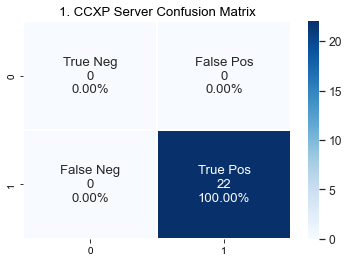

In [44]:
import seaborn as sns
#Label 1: server
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_server_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_server_cm_plt.flatten()/np.sum(ccxp_server_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_server_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "1. CCXP Server Confusion Matrix" )
plt.show()

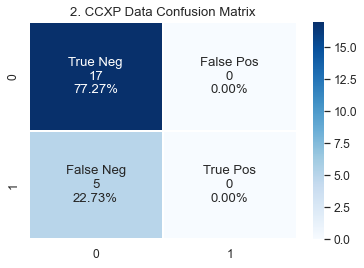

In [45]:
# Label 2: data
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_data_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_data_cm_plt.flatten()/np.sum(ccxp_data_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_data_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "2. CCXP Data Confusion Matrix" )
plt.show()

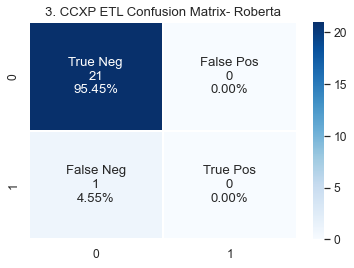

In [46]:
# Label 3: etl
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_etl_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_etl_cm_plt.flatten()/np.sum(ccxp_etl_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_etl_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "3. CCXP ETL Confusion Matrix- Roberta" )
plt.show()

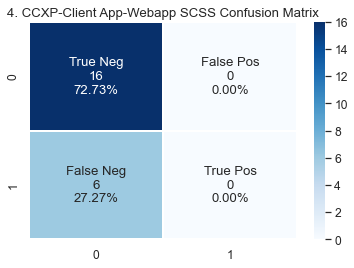

In [47]:
# Label 4: ca_scss
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_ca_scss_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_ca_scss_cm_plt.flatten()/np.sum(ccxp_ca_scss_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_ca_scss_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "4. CCXP-Client App-Webapp SCSS Confusion Matrix" )
plt.show()

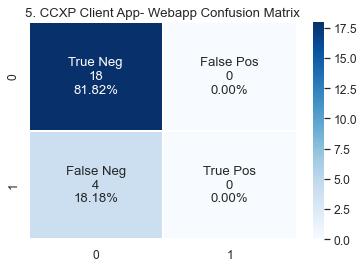

In [48]:
# Label 5: ca_webapp
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_ca_webapp_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_ca_webapp_cm_plt.flatten()/np.sum(ccxp_ca_webapp_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_ca_webapp_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "5. CCXP Client App- Webapp Confusion Matrix" )
plt.show()

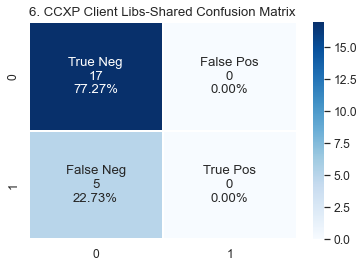

In [49]:
# Label 6: cl_shared
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_cl_shared_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_cl_shared_cm_plt.flatten()/np.sum(ccxp_cl_shared_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_cl_shared_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "6. CCXP Client Libs-Shared Confusion Matrix" )
plt.show()

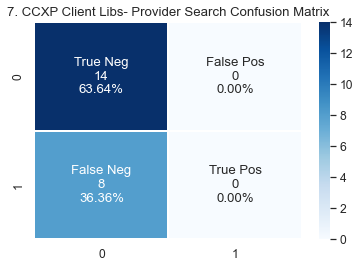

In [50]:
# Label 7: cl_prov_search
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_cl_prov_search_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_cl_prov_search_cm_plt.flatten()/np.sum(ccxp_cl_prov_search_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_cl_prov_search_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "7. CCXP Client Libs- Provider Search Confusion Matrix" )
plt.show()

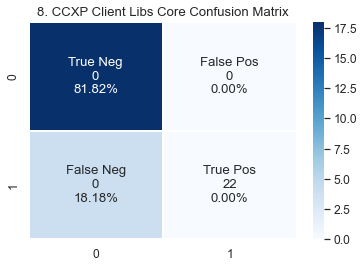

In [51]:
# Label 8: cl_core
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_server_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_cl_core_cm_plt.flatten()/np.sum(ccxp_cl_core_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_cl_core_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "8. CCXP Client Libs Core Confusion Matrix" )
plt.show()

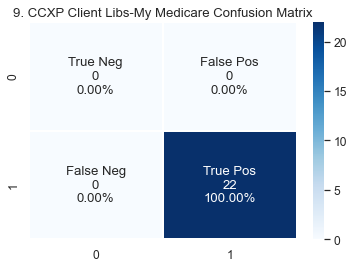

In [52]:
# Label 9: cl_mymedicare
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_cl_mymedicare_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_cl_mymedicare_cm_plt.flatten()/np.sum(ccxp_cl_mymedicare_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_cl_mymedicare_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "9. CCXP Client Libs-My Medicare Confusion Matrix" )
plt.show()

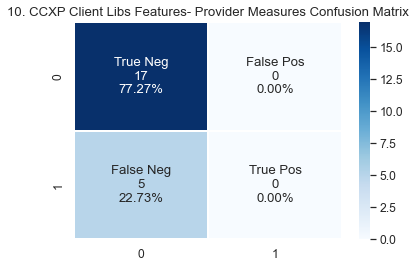

In [53]:
# Label 10 cl_feat_pmeasure
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_cl_feat_pmeasure_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_cl_feat_pmeasure_cm_plt.flatten()/np.sum(ccxp_cl_feat_pmeasure_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_cl_feat_pmeasure_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "10. CCXP Client Libs Features- Provider Measures Confusion Matrix" )
plt.show()

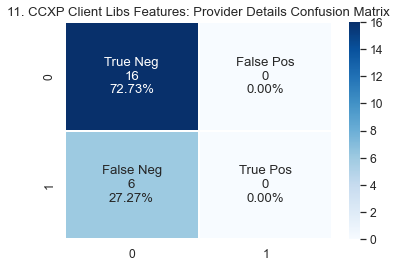

In [54]:
# Label 11 cl_feat_pdetails
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_cl_feat_pdetails_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_cl_feat_pdetails_cm_plt.flatten()/np.sum(ccxp_cl_feat_pdetails_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_cl_feat_pdetails_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "11. CCXP Client Libs Features: Provider Details Confusion Matrix" )
plt.show()

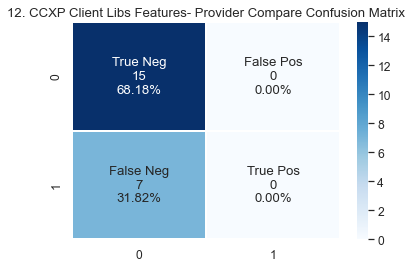

In [55]:
# Label 12 cl_feat_pcompare
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                ccxp_cl_feat_pcompare_cm_plt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     ccxp_cl_feat_pcompare_cm_plt.flatten()/np.sum(ccxp_cl_feat_pcompare_cm_plt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplot()
sns.set(font_scale=1.1) #edited as suggested
ax = sns.heatmap(ccxp_cl_feat_pcompare_cm_plt ,cmap='Blues', linewidth = 0.25 , fmt='',annot = labels)
plt.title( "12. CCXP Client Libs Features- Provider Compare Confusion Matrix" )
plt.show()